### EDA Case Study - Understainding Human Activity with Smart Phones

In [5]:
#Setup the plot sizes for the remainder of the notebook
library(repr)
options(repr.plot.width = 6, repr.plot.height = 3, repr.plot.pointsize = 8)

In [1]:
#Data obtained from - https://github.com/rdpeng/courses/blob/master/04_ExploratoryAnalysis/clusteringExample/data/samsungData.rda

load("data/samsungData.rda")
names(samsungData)[1:12]

[1] "tBodyAcc-mean()-X" "tBodyAcc-mean()-Y" "tBodyAcc-mean()-Z"
 [4] "tBodyAcc-std()-X"  "tBodyAcc-std()-Y"  "tBodyAcc-std()-Z" 
 [7] "tBodyAcc-mad()-X"  "tBodyAcc-mad()-Y"  "tBodyAcc-mad()-Z" 
[10] "tBodyAcc-max()-X"  "tBodyAcc-max()-Y"  "tBodyAcc-max()-Z"

In [2]:
table(samsungData$activity)


  laying  sitting standing     walk walkdown   walkup 
    1407     1286     1374     1226      986     1073 

Plotting average acceleration for first subject

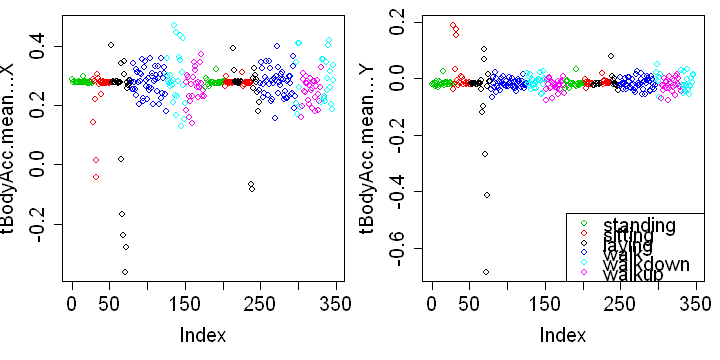

In [8]:
par(mfrow = c(1,2), mar = c(5,4,1,1))
samsungData <- transform(samsungData, activity = factor(activity))
sub1 <- subset(samsungData, subject ==1)
plot(sub1[,1], col = sub1$activity, ylab = names(sub1)[1])
plot(sub1[,2], col = sub1$activity, ylab = names(sub1)[2])
legend("bottomright", legend = unique(sub1$activity), col = unique(sub1$activity), pch =1)

Plotting max acceleration for the first subject

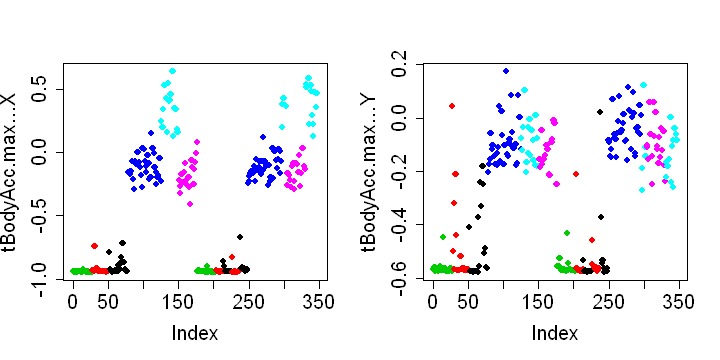

In [10]:
par(mfrow = c(1,2))
plot(sub1[,10], pch = 19, col = sub1$activity, ylab = names(sub1)[10])
plot(sub1[,11], pch = 19, col = sub1$activity, ylab = names(sub1)[11])

Singular Value Decomposition

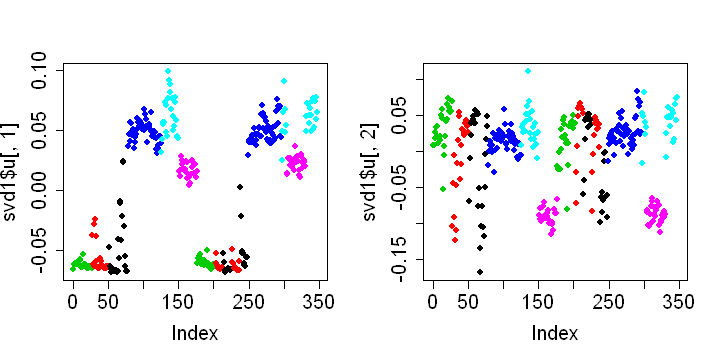

In [12]:
svd1 = svd(scale(sub1[, -c(562, 563)]))
par(mfrow = c(1,2))
plot(svd1$u[,1], col = sub1$activity, pch = 19)
plot(svd1$u[,2], col = sub1$activity, pch = 19)

Find maximum contributor

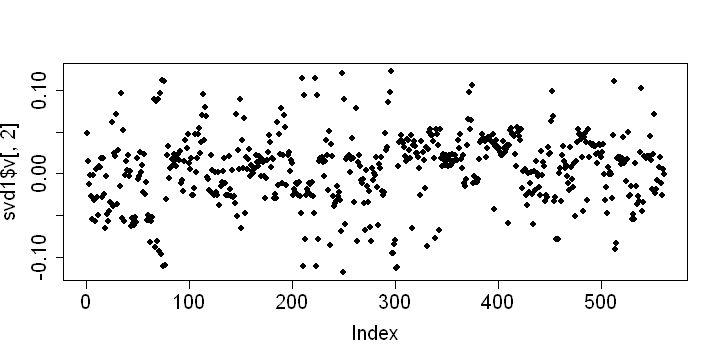

In [13]:
plot(svd1$v[,2], pch = 19)

In [14]:
maxContrib <- which.max(svd1$v[,2]) #determine the max conributor is
names(samsungData)[maxContrib]


[1] "fBodyAcc.meanFreq...Z"

K Means clustering

In [15]:
kClust <- kmeans(sub1[, -c(562, 563)], centers = 6) #nstart = 1, first try
table(kClust$cluster, sub1$activity)

   
    laying sitting standing walk walkdown walkup
  1     26      34       48    0        0      0
  2      0       0        0   95        0      0
  3      5       0        0    0        0     53
  4     19      13        5    0        0      0
  5      0       0        0    0       23      0
  6      0       0        0    0       26      0

In [18]:
kClust <- kmeans(sub1[, -c(562, 563)], centers = 6, nstart = 100) 
table(kClust$cluster, sub1$activity)

   
    laying sitting standing walk walkdown walkup
  1      0      37       51    0        0      0
  2     29       0        0    0        0      0
  3      0       0        0    0       49      0
  4      0       0        0   95        0      0
  5      3       0        0    0        0     53
  6     18      10        2    0        0      0

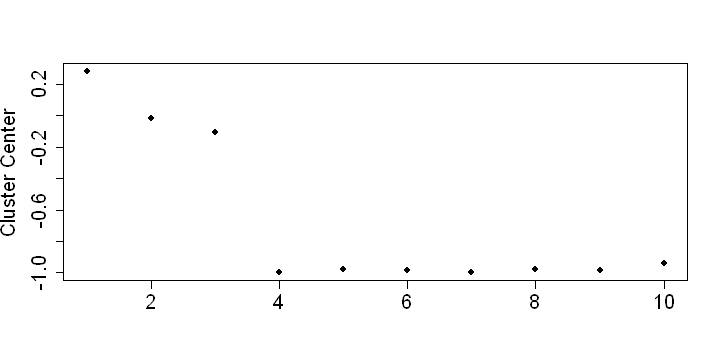

In [19]:
plot(kClust$center[1,1:10], pch = 19, ylab = "Cluster Center", xlab = "" ) #Laying

## Air Pollution Case Study

In [24]:
pm0 <- read.csv("data/daily_88101_2009.csv")
pm1 <- read.csv("data/daily_88101_2012.csv")

In [22]:
dim(pm0)

[1] 200653     29

In [23]:
head(pm0)

,State.Code,County.Code,Site.Num,Parameter.Code,POC,Latitude,Longitude,Datum,Parameter.Name,Sample.Duration,...,AQI,Method.Code,Method.Name,Local.Site.Name,Address,State.Name,County.Name,City.Name,CBSA.Name,Date.of.Last.Change
1,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,56,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01
2,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,18,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01
3,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,20,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01
4,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,30,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01
5,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,33,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01
6,1,3,10,88101,1,30.498001,-87.881412,NAD83,PM2.5 - Local Conditions,24 HOUR,...,46,118,R & P Model 2025 PM2.5 Sequential w/WINS - GRAVIMETRIC,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, FAIRHOPE, ALABAMA",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2015-04-01


In [25]:
names(pm0)

[1] "State.Code"          "County.Code"         "Site.Num"           
 [4] "Parameter.Code"      "POC"                 "Latitude"           
 [7] "Longitude"           "Datum"               "Parameter.Name"     
[10] "Sample.Duration"     "Pollutant.Standard"  "Date.Local"         
[13] "Units.of.Measure"    "Event.Type"          "Observation.Count"  
[16] "Observation.Percent" "Arithmetic.Mean"     "X1st.Max.Value"     
[19] "X1st.Max.Hour"       "AQI"                 "Method.Code"        
[22] "Method.Name"         "Local.Site.Name"     "Address"            
[25] "State.Name"          "County.Name"         "City.Name"          
[28] "CBSA.Name"           "Date.of.Last.Change"

In [28]:
x0 <- pm0$Pollutant.Standard

In [29]:
head(x0)

[1] PM25 24-hour 2006 PM25 24-hour 2006 PM25 24-hour 2006 PM25 24-hour 2006
[5] PM25 24-hour 2006 PM25 24-hour 2006
Levels:  PM25 24-hour 2006